In [1]:
from mlcolvar.cvs import MultiTaskCV
from mlcolvar.cvs import AutoEncoderCV
from mlcolvar.core.loss import TDALoss

import torch
#torch.set_default_dtype(torch.float32)
# Set seed for reproducibility
torch.manual_seed(42)

/home/sompriya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import numpy as np
!cat ../../unfolded_unbiased/COLVAR_unfolded ts_data/all_data ../../folded_unbiased/COLVAR_folded > combined
l = np.loadtxt('combined')
#np.savetxt('combined_new',l,fmt='%0.4f')
#!echo -e "#! FIELDS time d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 d11 d12 d13 d14 d15 d16 d17 d18 d19 d20 d21 d22 d23 d24 d25 d26 d27 d28 d29 d30 d31 d32 d33 d34 d35 d36 d37 d38 d39 d40 d41 d42 d43 d44 d45 d46 d47 d48 d49 d50 d51 d52 d53 d54 d55 d56 d57 d58 d59 d60 d61 d62 d63 d64 d65 d66 d67 d68 d69 d70 d71 d72 d73 d74 d75 d76 d77 d78 d79 d80 d81 d82 d83 d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99 d100 d101 d102 d103 d104 d105 d106 d107 d108 d109 d110 d111 d112 d113 d114 d115 d116 d117 d118 d119 d120 d121 d122 d123 d124 d125 d126 d127 d128 d129 d130 d131 d132 d133 d134 d135 d136 d137 d138 d139 d140 d141 d142 d143 d144 d145 d146 d147 d148 d149 d150 d151 d152 d153 d154 d155 d156 d157 d158 d159 d160 d161 d162 d163 d164 d165 d166 d167 d168 d169 d170 d171 d172 d173 d174 d175 d176 d177 d178 d179 d180 d181 d182 d183 d184 d185 d186 d187 d188 d189 d190 d191 d192 d193 d194 d195 d196 d197 d198 d199 d200 d201 d202 d203 d204 d205 d206 d207 d208 d209 d210\n$(cat combined_new)" > combined_new

In [3]:
np.savetxt('combined_new',l,fmt='%0.4f')

In [4]:
!echo -e "#! FIELDS time d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 d11 d12 d13 d14 d15 d16 d17 d18 d19 d20 d21 d22 d23 d24 d25 d26 d27 d28 d29 d30 d31 d32 d33 d34 d35 d36 d37 d38 d39 d40 d41 d42 d43 d44 d45 d46 d47 d48 d49 d50 d51 d52 d53 d54 d55 d56 d57 d58 d59 d60 d61 d62 d63 d64 d65 d66 d67 d68 d69 d70 d71 d72 d73 d74 d75 d76 d77 d78 d79 d80 d81 d82 d83 d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99 d100 d101 d102 d103 d104 d105 d106 d107 d108 d109 d110 d111 d112 d113 d114 d115 d116 d117 d118 d119 d120 d121 d122 d123 d124 d125 d126 d127 d128 d129 d130 d131 d132 d133 d134 d135 d136 d137 d138 d139 d140 d141 d142 d143 d144 d145 d146 d147 d148 d149 d150 d151 d152 d153 d154 d155 d156 d157 d158 d159 d160 d161 d162 d163 d164 d165 d166 d167 d168 d169 d170 d171 d172 d173 d174 d175 d176 d177 d178 d179 d180 d181 d182 d183 d184 d185 d186 d187 d188 d189 d190 d191 d192 d193 d194 d195 d196 d197 d198 d199 d200 d201 d202 d203 d204 d205 d206 d207 d208 d209 d210\n$(cat combined_new)" > combined_new

In [5]:
!head combined_new

#! FIELDS time d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 d11 d12 d13 d14 d15 d16 d17 d18 d19 d20 d21 d22 d23 d24 d25 d26 d27 d28 d29 d30 d31 d32 d33 d34 d35 d36 d37 d38 d39 d40 d41 d42 d43 d44 d45 d46 d47 d48 d49 d50 d51 d52 d53 d54 d55 d56 d57 d58 d59 d60 d61 d62 d63 d64 d65 d66 d67 d68 d69 d70 d71 d72 d73 d74 d75 d76 d77 d78 d79 d80 d81 d82 d83 d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99 d100 d101 d102 d103 d104 d105 d106 d107 d108 d109 d110 d111 d112 d113 d114 d115 d116 d117 d118 d119 d120 d121 d122 d123 d124 d125 d126 d127 d128 d129 d130 d131 d132 d133 d134 d135 d136 d137 d138 d139 d140 d141 d142 d143 d144 d145 d146 d147 d148 d149 d150 d151 d152 d153 d154 d155 d156 d157 d158 d159 d160 d161 d162 d163 d164 d165 d166 d167 d168 d169 d170 d171 d172 d173 d174 d175 d176 d177 d178 d179 d180 d181 d182 d183 d184 d185 d186 d187 d188 d189 d190 d191 d192 d193 d194 d195 d196 d197 d198 d199 d200 d201 d202 d203 d204 d205 d206 d207 d208 d209 d210
0.0000 0.3768 1.9517 0.1584 0.5267 0.3611 1

In [6]:
from mlcolvar.data import DictModule
from mlcolvar.core.transform import Normalization
from mlcolvar.core.transform.utils import Statistics
from mlcolvar.utils.fes import compute_fes
from mlcolvar.utils.io import create_dataset_from_files, load_dataframe
from mlcolvar.utils.plot import muller_brown_potential_three_states, plot_isolines_2D, plot_metrics, paletteFessa
from mlcolvar.utils.trainer import MetricsCallback

# load unlabeled data
filenames = [ "combined_new" ]
path_dataset, path_df = create_dataset_from_files(filenames, return_dataframe=True,
                                                  filter_args={'regex':'d'}, 
                                                    verbose=False, stride=1)
# load labeled data
filenames = [ "../../unfolded_unbiased/COLVAR_unfolded", "../../folded_unbiased/COLVAR_folded" ]
state_dataset, state_df = create_dataset_from_files(filenames,return_dataframe=True,
                                                    filter_args={'regex':'d'}, 
                                                    verbose=False, stride=1)

# create multitask datamodule with both datasets
datamodule = DictModule(dataset=[path_dataset, state_dataset])
datamodule

/home/sompriya/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sompriya/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


DictModule(dataset -> [DictDataset( "data": [20190, 210] ), DictDataset( "data": [2002, 210], "labels": [2002] )],
		     train_loader -> DictLoader(length=0.8, batch_size=0, shuffle=True),
		     valid_loader -> DictLoader(length=0.2, batch_size=0, shuffle=True))

In [7]:
import torch

class AutoencoderPath(AutoEncoderCV):
  def __init__(self,**kwargs):
    super().__init__(**kwargs)

  def forward(self,x):
    s = super().forward(x)
    x_hat = super().encode_decode(x)
    loss = torch.nn.MSELoss(reduction='none') 
    z = torch.linalg.norm(loss(x,x_hat) , dim=-1)
    return torch.hstack([s,z.unsqueeze(dim=-1)])


In [8]:
n_states=2

nn_args = {'activation': 'shifted_softplus'}
options= {'encoder': nn_args, 'decoder': nn_args }

main_cv = AutoencoderPath(encoder_layers=[210,50,50,1] , options=options)
aux_loss_fn = TDALoss(n_states, [-5, 5], [0.2, 0.2])
model = MultiTaskCV(main_cv, auxiliary_loss_fns=[aux_loss_fn], loss_coefficients=[5e-3])

stat = Statistics()
stat(path_dataset['data'])
stat(state_dataset['data'])
model.norm_in.set_from_stats(stat)
#model = model.float(); model.to("mps")

model.optimizer_kwargs = {'weight_decay' : 1e-6, 'lr' : 5e-3 }
#model.optimizer_kwargs = {'lr' : 1e-2 }
#model.to('cpu')
model

MultiTaskAutoencoderPath(
  (loss_fn): MSELoss()
  (norm_in): Normalization(in_features=210, out_features=210, mode=mean_std)
  (encoder): FeedForward(
    (nn): Sequential(
      (0): Linear(in_features=210, out_features=50, bias=True)
      (1): Shifted_Softplus(beta=1, threshold=20)
      (2): Linear(in_features=50, out_features=50, bias=True)
      (3): Shifted_Softplus(beta=1, threshold=20)
      (4): Linear(in_features=50, out_features=1, bias=True)
    )
  )
  (decoder): FeedForward(
    (nn): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): Shifted_Softplus(beta=1, threshold=20)
      (2): Linear(in_features=50, out_features=50, bias=True)
      (3): Shifted_Softplus(beta=1, threshold=20)
      (4): Linear(in_features=50, out_features=210, bias=True)
    )
  )
  (auxiliary_loss_fns): ModuleList(
    (0): TDALoss()
  )
)

In [9]:
from lightning import Trainer
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from mlcolvar.utils.trainer import MetricsCallback

# define callbacks
metrics = MetricsCallback()
early_stopping = EarlyStopping(monitor="valid_total_loss", patience=20, min_delta=1e-3)

# define trainer
trainer = Trainer(callbacks=[metrics, early_stopping], logger=None, enable_checkpointing=False, max_epochs=1000)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/sompriya/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [10]:
torch.set_float32_matmul_precision('medium')
#device = torch.device("cpu")
trainer.fit( model, datamodule )

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name               | Type          | Params | Mode  | In sizes | Out sizes
------------------------------------------------------------------------------------
0 | loss_fn            | MSELoss       | 0      | train | ?        | ?        
1 | norm_in            | Normalization | 0      | train | [210]    | [210]    
2 | encoder            | FeedForward   | 13.2 K | train | [210]    | [1]      
3 | decoder            | FeedForward   | 13.4 K | train | [1]      | [210]    
4 | auxiliary_loss_fns | ModuleList    | 0      | train | ?        | ?        
------------------------------------------------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/home/sompriya/.local/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4038. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/sompriya/.local/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                               | 0/? [00:00<?, ?it/s]

/home/sompriya/.local/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16152. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

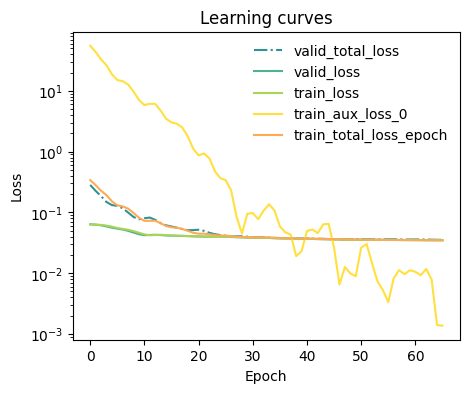

In [11]:
from mlcolvar.utils.plot import plot_metrics

ax = plot_metrics(metrics.metrics,
                  keys=['valid_total_loss','valid_loss','train_loss', 'train_aux_loss_0', 'train_total_loss_epoch'],
                  linestyles=['-.','-','-','-','-'], colors=['fessa1','fessa2','fessa3','fessa4','fessa5'],
                  yscale='log')

In [12]:
decoder = model.get_decoder(return_normalization=True)

In [13]:
X = path_dataset[:]['data']
with torch.no_grad():
    model.postprocessing = None # reset
    s = model(torch.Tensor(X))
s_np = s.numpy()
print(s_np.max(),s_np.min())

5.5461893 -5.7509484


In [14]:
xx = torch.linspace(s_np.min(),s_np.max(),10).unsqueeze(1)
xy_gen = decoder(xx).detach().numpy()

In [15]:
#print(xy_gen)
print(s_np)

[[-5.0453444   0.8073535 ]
 [-5.011114    0.48912948]
 [-5.0502744   0.5719062 ]
 ...
 [ 5.124657    0.16039085]
 [ 4.4217577   0.22845145]
 [ 4.291055    0.6337333 ]]


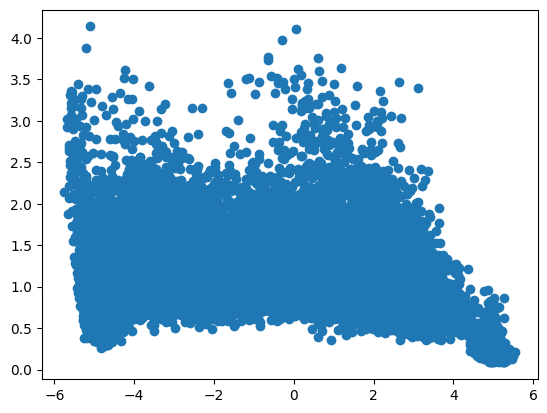

In [17]:
import matplotlib.pyplot as plt
plt.scatter(s_np[:,0],s_np[:,1])

[[-5.0453444   0.8073535 ]
 [-5.011114    0.48912948]
 [-5.0502744   0.5719062 ]
 ...
 [ 5.124657    0.16039085]
 [ 4.4217577   0.22845145]
 [ 4.291055    0.6337333 ]]
[[0.3768 1.9517 0.1584 ... 0.2625 0.3179 0.2382]
 [0.4069 2.202  0.1521 ... 0.2546 0.313  0.2362]
 [0.4538 2.332  0.1623 ... 0.2409 0.29   0.2401]
 ...
 [1.0626 0.603  0.1702 ... 0.2532 0.2745 0.2435]
 [1.0016 0.5952 0.1572 ... 0.2496 0.2901 0.2455]
 [0.9942 0.5188 0.1561 ... 0.2455 0.2933 0.2434]]


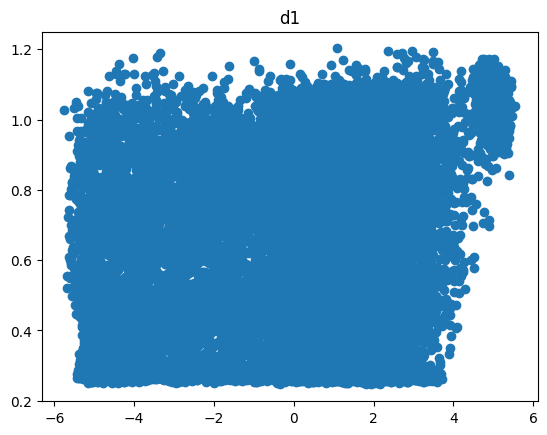

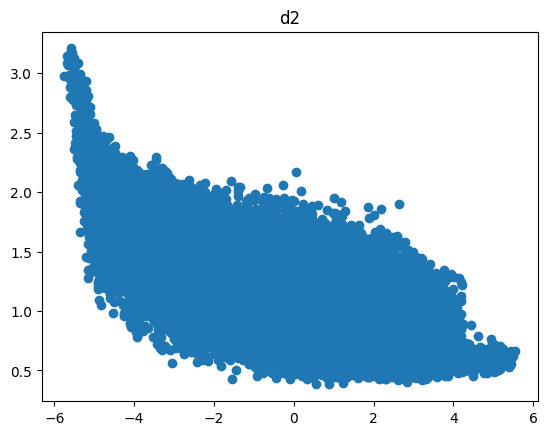

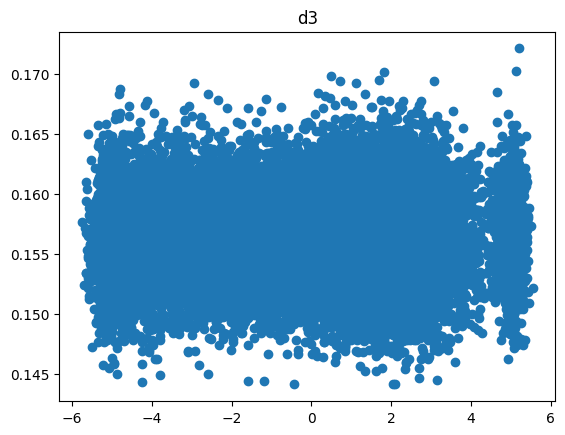

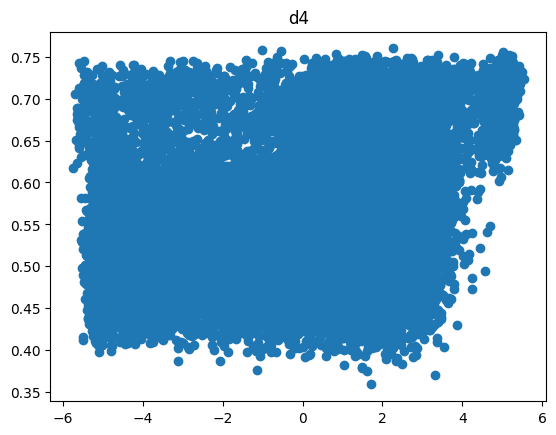

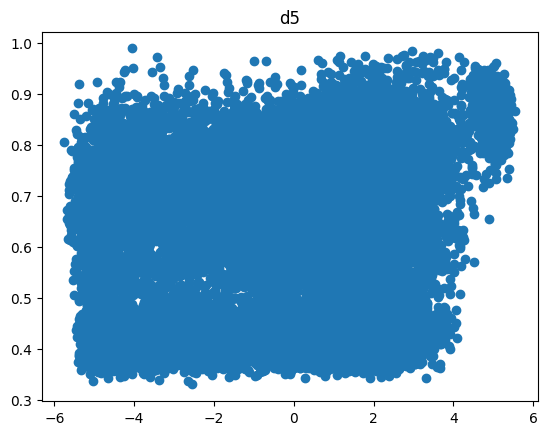

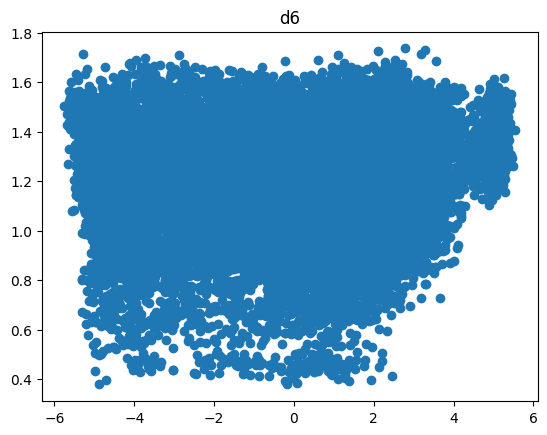

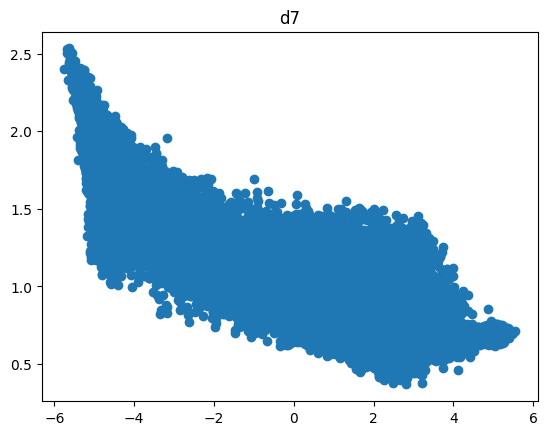

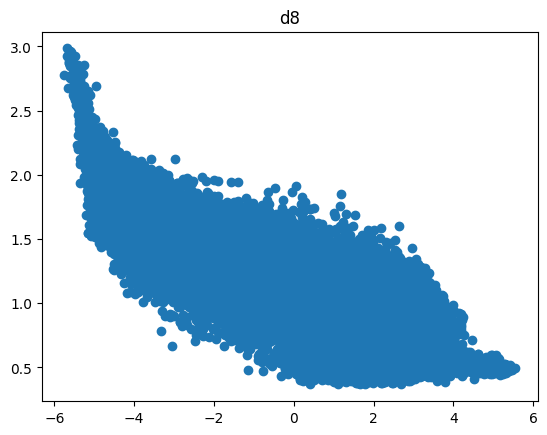

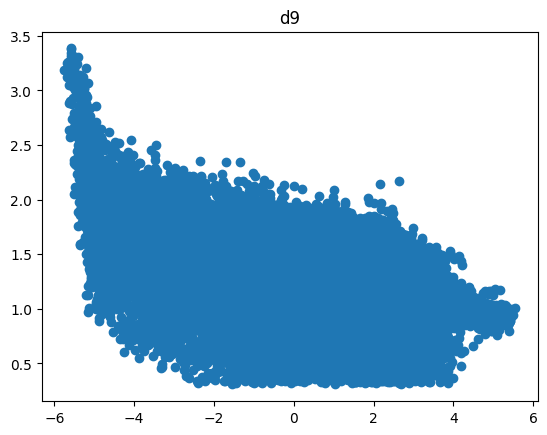

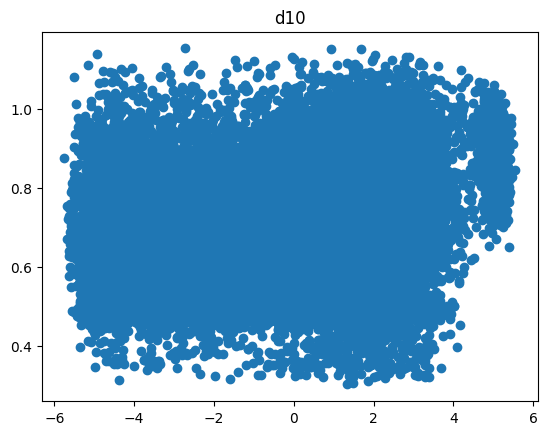

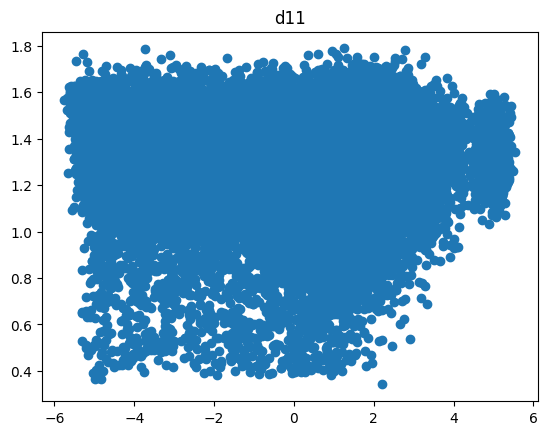

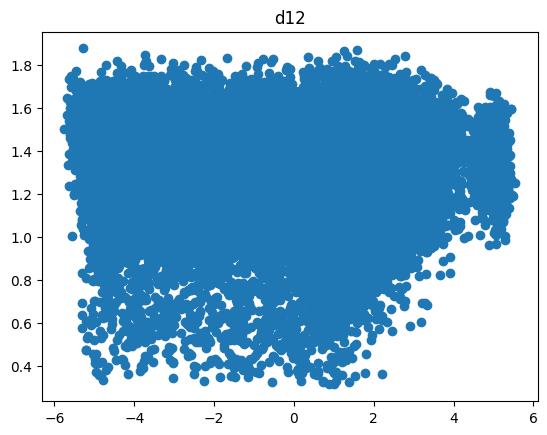

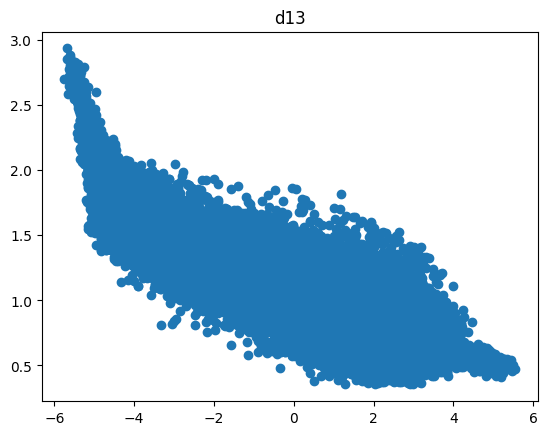

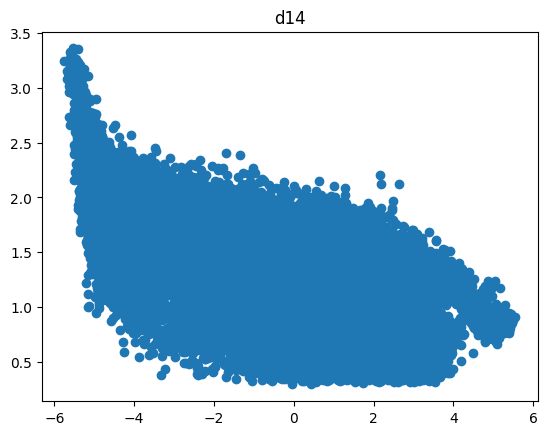

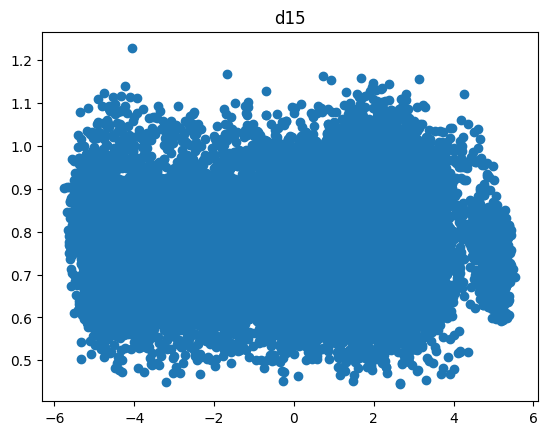

In [18]:
import matplotlib.pyplot as plt
import numpy as np



dist = path_df.filter(regex='d').to_numpy()
with torch.no_grad():
    model.postprocessing = None # reset
    s_dist = model(torch.Tensor(dist))
s_dist_np = s_dist.numpy()
print(s_dist_np)
print(dist)

for i in range(15):
    plt.figure()
    plt.scatter(s_dist_np[:,0],dist[:,i])
    plt.title('d%d'%(i+1))

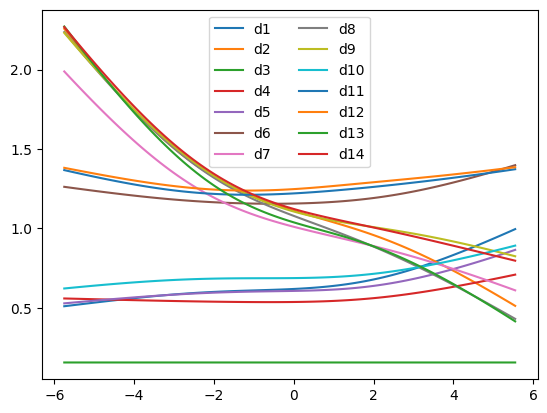

In [19]:
xx = torch.linspace(s_np.min(),s_np.max(),100)
xy_gen = decoder(xx.view(-1,1)).detach().numpy()

for i in range(14):
    plt.plot(xx.detach().numpy(),xy_gen[:,i],label='d%d'%(i+1))
plt.legend(ncols=2)

In [20]:
model.to_torchscript(file_path="multitask_round2.ptc", method="trace")

/home/sompriya/.local/lib/python3.10/site-packages/mlcolvar/core/nn/utils.py:13: TracerWarning: Converting a tensor to a Python number might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  sp0 = F.softplus(torch.zeros(1), self.beta, self.threshold).item()


MultiTaskAutoencoderPath(
  original_name=MultiTaskAutoencoderPath
  (loss_fn): MSELoss(original_name=MSELoss)
  (norm_in): Normalization(original_name=Normalization)
  (encoder): FeedForward(
    original_name=FeedForward
    (nn): Sequential(
      original_name=Sequential
      (0): Linear(original_name=Linear)
      (1): Shifted_Softplus(original_name=Shifted_Softplus)
      (2): Linear(original_name=Linear)
      (3): Shifted_Softplus(original_name=Shifted_Softplus)
      (4): Linear(original_name=Linear)
    )
  )
  (decoder): FeedForward(
    original_name=FeedForward
    (nn): Sequential(
      original_name=Sequential
      (0): Linear(original_name=Linear)
      (1): Shifted_Softplus(original_name=Shifted_Softplus)
      (2): Linear(original_name=Linear)
      (3): Shifted_Softplus(original_name=Shifted_Softplus)
      (4): Linear(original_name=Linear)
    )
  )
  (auxiliary_loss_fns): ModuleList(
    original_name=ModuleList
    (0): TDALoss(original_name=TDALoss)
  )
)